# Dimensionality Reduction Using K-Means and PCA

## Armaan Johal & Aidan Truel

In [49]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image as im
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [50]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)
X = X.to_numpy()

X shape: (70000, 784) y shape: (70000,)


In [51]:
digits = {j:[] for j in range(10)}
for j in range(len(y)): # takes data assigns it into a dictionary
    digits[int(y[j])].append(X[j].reshape(28,28))
digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be one numpy array
for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape)

Shape of data with label 0 : (6903, 28, 28)
Shape of data with label 1 : (7877, 28, 28)
Shape of data with label 2 : (6990, 28, 28)
Shape of data with label 3 : (7141, 28, 28)
Shape of data with label 4 : (6824, 28, 28)
Shape of data with label 5 : (6313, 28, 28)
Shape of data with label 6 : (6876, 28, 28)
Shape of data with label 7 : (7293, 28, 28)
Shape of data with label 8 : (6825, 28, 28)
Shape of data with label 9 : (6958, 28, 28)


In [52]:
def reduce_dim(data, dims, method): 
    if method=='none':
        return data
    elif method=='kmeans':
        model = KMeans(dims).fit(data)
        centers = model.cluster_centers_
    elif method=='mixture':
        model = GaussianMixture(n_components=dims).fit(data)
        centers = model.means_
    reduced_data = np.zeros((data.shape[0],dims))
    for i, img in enumerate(data):
        reduced_img = np.zeros((dims))
        for d,center in enumerate(centers):
            reduced_img[d] = np.linalg.norm(img-center)
        reduced_data[i] = reduced_img
    return reduced_data

In [53]:
# add size parameter?
def output_data(num1, num2, dims, method='kmeans', size=1000, split=0.5):
    # gathers training and testing data for num1 & num2 type data
    trainSize = int(size * split)
    testSize = size - trainSize
    x_train = np.concatenate([digits[num1][:trainSize].reshape(trainSize,28*28),
                            digits[num2][:trainSize].reshape(trainSize,28*28)])
    x_train = reduce_dim(x_train, dims, method)
    y_train = np.concatenate([np.ones(trainSize), -1*np.ones(trainSize)]).reshape(2*trainSize,)
    x_test = np.concatenate([digits[num1][trainSize:size].reshape(testSize,28*28),
                            digits[num2][trainSize:size].reshape(testSize,28*28)])
    x_test = reduce_dim(x_test, dims, method)
    max_val = np.max(x_train)
    y_test = np.concatenate([np.ones(testSize), -1*np.ones(testSize)]).reshape(2*testSize,)
    return x_train/max_val, y_train, x_test/max_val, y_test

In [54]:
def output_all_data(dims, method='kmeans', size=1000, split=0.5):
    # gathers training and testing data for num1 & num2 type data
    trainSize = int(size * split)
    testSize = size - trainSize
    x_train = np.zeros((10*trainSize,28*28))
    for i in range(10):
        i_digits = digits[i][:trainSize].reshape(trainSize,28*28)
        x_train[trainSize*i:trainSize*(i+1)] = i_digits
    x_train = reduce_dim(x_train, dims, method)
    y_train = np.concatenate([np.full(trainSize,0), np.full(trainSize,1),
              np.full(trainSize,2),np.full(trainSize,3),np.full(trainSize,4),
              np.full(trainSize,5),np.full(trainSize,6),np.full(trainSize,7),
              np.full(trainSize,8),np.full(trainSize,9)]).reshape(10*trainSize,)
    x_test = np.zeros((10*testSize,28*28))
    for i in range(10):
        i_digits = digits[i][trainSize:size].reshape(testSize,28*28)
        x_test[testSize*i:testSize*(i+1)] = i_digits
    x_test = reduce_dim(x_test, dims, method)
    max_val = np.max(x_train)
    y_test = np.concatenate([np.full(testSize,0), np.full(testSize,1),
              np.full(testSize,2),np.full(testSize,3),np.full(testSize,4),
              np.full(testSize,5),np.full(testSize,6),np.full(testSize,7),
              np.full(testSize,8),np.full(testSize,9)]).reshape(10*testSize,)
    return x_train/max_val, y_train, x_test/max_val, y_test

In [55]:
def KNNclassifier(trainX, trainY, n_neighbors):
    ''' Return a KNN model by fitting training data (trainX, trainY)
    Args:
        trainX: a (# of images, nCluster) array of features for training data
        trainY: a (# of images) array of class label for training data
        n_neighbors: # of neighbors used in KNN classifier
    Return:
        model: KNN classifier model
    '''
    model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(trainX, trainY)
    return model

def getAccuracy(testX, testY, model):
    ''' Output the testing accuracy for KNN classifier model 
    Args:
        testX: a (# of images, nCluster) array of features for testing data
        testY: a (# of images) array of class label for testing data
        model: KNN classifier model
    Return:
        accu: accuracy of classification prediction on testing data
    '''
    accu = model.score(testX, testY)
    return accu

## K-means Dimensionality Reduction for MNIST Dataset

In [56]:
num1 = 0
num2 = 1
n_neighbors = 5
clusters = 2

In [57]:
trainX, trainY, testX, testY = output_data(num1,num2,clusters, size=2000, split=0.8)
model = KNNclassifier(trainX, trainY, n_neighbors)
accu = getAccuracy(testX, testY, model)
print(accu)

0.99375


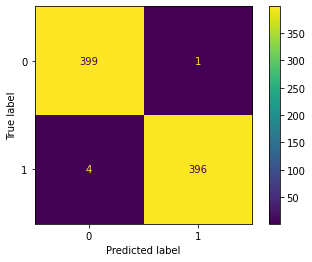

In [58]:
predY = model.predict(testX)
labels = [1,-1]
display_labels = [num1,num2]
cm = confusion_matrix(testY, predY, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
disp.plot()
plt.show()

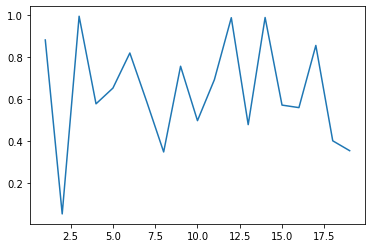

In [59]:
num1 = 0
num2 = 1
dim_vals = np.arange(1,20,1)
accu_vals = []
for i in dim_vals:
    dims = i
    trainX, trainY, testX, testY = output_data(num1,num2,dims)
    model = KNNclassifier(trainX, trainY, n_neighbors)
    accu = getAccuracy(testX, testY, model)
    accu_vals.append(accu)
plt.plot(dim_vals, accu_vals)

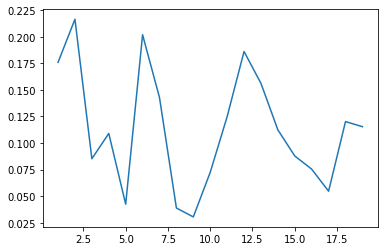

In [60]:
dim_vals = np.arange(1,20,1)
accu_vals = []
for i in dim_vals:
    dims = i
    trainX, trainY, testX, testY = output_all_data(dims)
    model = KNNclassifier(trainX, trainY, n_neighbors)
    accu = getAccuracy(testX, testY, model)
    accu_vals.append(accu)
plt.plot(dim_vals, accu_vals)

In [61]:
n_neighbors = 5
dims = 10
size = 2000
split = 0.8
trainX, trainY, testX, testY = output_all_data(dims, method='none', size=size, split=split)
model = KNNclassifier(trainX, trainY, n_neighbors)
accu = getAccuracy(testX, testY, model)
print(accu)

0.951


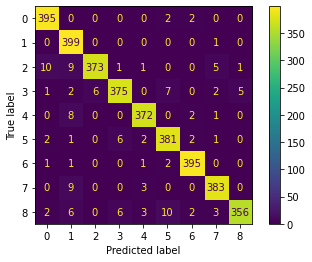

In [62]:
predY = model.predict(testX)
labels = np.arange(0,9,1)
cm = confusion_matrix(testY, predY, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.show()

## PCR Dimensionality Reduction for MNIST Dataset

In [63]:
# add size parameter?
def output_pca_data(num1, num2, num_components, size=1000, split=0.5, method='pca', kernel='linear'):
    # gathers training and testing data for num1 & num2 type data
    trainSize = int(size * split)
    testSize = size - trainSize
    x_train = np.concatenate([digits[num1][:trainSize].reshape(trainSize,28*28),
                            digits[num2][:trainSize].reshape(trainSize,28*28)])
    evr = 0
    if method=='pca':
        pca = PCA(num_components).fit(x_train)
        evr = np.sum(pca.explained_variance_ratio_)
    elif method=='kernelpca':
        pca = KernelPCA(num_components, kernel=kernel).fit(x_train)
    x_train = pca.transform(x_train)
    y_train = np.concatenate([np.ones(trainSize), -1*np.ones(trainSize)]).reshape(2*trainSize,)
    x_test = np.concatenate([digits[num1][trainSize:size].reshape(testSize,28*28),
                            digits[num2][trainSize:size].reshape(testSize,28*28)])
    x_test = pca.transform(x_test)
    max_val = np.max(x_train)
    y_test = np.concatenate([np.ones(testSize), -1*np.ones(testSize)]).reshape(2*testSize,)
    return x_train/max_val, evr, y_train, x_test/max_val, y_test

In [64]:
def output_all_data(num_components, method='pca', kernel='linear', size=1000, split=0.5):
    pca1evr = False
    trainSize = int(size * split)
    testSize = size - trainSize
    x_train = np.zeros((10*trainSize,28*28))
    for i in range(10):
        i_digits = digits[i][:trainSize].reshape(trainSize,28*28)
        x_train[trainSize*i:trainSize*(i+1)] = i_digits
    evr = 0
    if method=='pca':
        pca = PCA(num_components).fit(x_train)
        evr = np.sum(pca.explained_variance_ratio_)
    elif method=='kernelpca':
        pca = KernelPCA(num_components, kernel=kernel).fit(x_train)
    x_train = pca.transform(x_train)
    y_train = np.concatenate([np.full(trainSize,0), np.full(trainSize,1),
              np.full(trainSize,2),np.full(trainSize,3),np.full(trainSize,4),
              np.full(trainSize,5),np.full(trainSize,6),np.full(trainSize,7),
              np.full(trainSize,8),np.full(trainSize,9)]).reshape(10*trainSize,)
    x_test = np.zeros((10*testSize,28*28))
    for i in range(10):
        i_digits = digits[i][trainSize:size].reshape(testSize,28*28)
        x_test[testSize*i:testSize*(i+1)] = i_digits
    x_test = pca.transform(x_test)
    max_val = np.max(x_train)
    y_test = np.concatenate([np.full(testSize,0), np.full(testSize,1),
              np.full(testSize,2),np.full(testSize,3),np.full(testSize,4),
              np.full(testSize,5),np.full(testSize,6),np.full(testSize,7),
              np.full(testSize,8),np.full(testSize,9)]).reshape(10*testSize,)
    return x_train/max_val, evr, y_train, x_test/max_val, y_test

In [65]:
num1 = 4
num2 = 9
n_neighbors = 5
num_components = 5

In [66]:
trainX, evr1, trainY, testX, testY = output_pca_data(num1,num2,num_components,method='pca',size=1000,split=0.5)
model = KNNclassifier(trainX, trainY, n_neighbors)
accu = getAccuracy(testX, testY, model)
print("Accuracy: ")
print(accu)

Accuracy: 
0.852


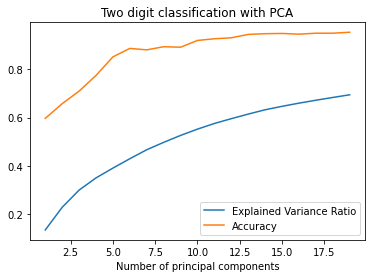

In [67]:
n_neighbors = 5
comps = np.arange(1,20,1)
evr_vals = []
accu_vals = []
for i in comps:
    num_components = i
    trainX, evr1, trainY, testX, testY = output_pca_data(num1,num2,num_components)
    model = KNNclassifier(trainX, trainY, n_neighbors)
    accu = getAccuracy(testX, testY, model)
    evr_vals.append(evr1)
    accu_vals.append(accu)
plt.plot(comps, evr_vals, comps, accu_vals)
plt.title("Two digit classification with PCA")
plt.legend(["Explained Variance Ratio", "Accuracy"])
plt.xlabel('Number of principal components')
plt.show()

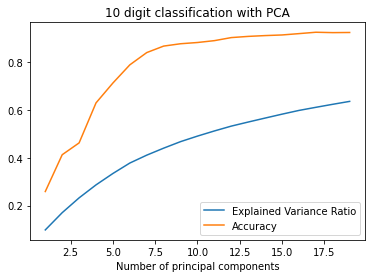

In [68]:
n_neighbors = 5
comps = np.arange(1,20,1)
evr_vals = []
accu_vals = []
for i in comps:
    num_components = i
    trainX, evr1, trainY, testX, testY = output_all_data(num_components)
    model = KNNclassifier(trainX, trainY, n_neighbors)
    accu = getAccuracy(testX, testY, model)
    evr_vals.append(evr1)
    accu_vals.append(accu)
plt.plot(comps, evr_vals, comps, accu_vals)
plt.title("10 digit classification with PCA")
plt.legend(["Explained Variance Ratio", "Accuracy"])
plt.xlabel('Number of principal components')
plt.show()

In [69]:
# Do not run with kernelpca
num_components = 20
n_neighbors = 5
method = 'pca' #Don't change this
trainX, evr1, trainY, testX, testY = output_all_data(num_components,method=method,size=2000,split=0.8)
model = KNNclassifier(trainX, trainY, n_neighbors)
accu = getAccuracy(testX, testY, model)
print("Accuracy: ")
print(accu)

Accuracy: 
0.9545


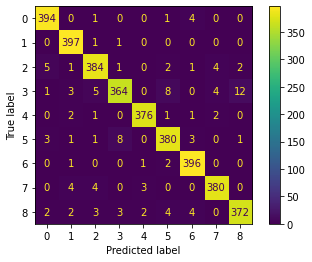

In [70]:
predY = model.predict(testX)
labels = np.arange(0,9,1)
cm = confusion_matrix(testY, predY, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.show()

## K-Means Dimensionality Reduction on Retinal Scans

In [6]:
X = np.zeros(shape=(402,423500))
for i in range (1,403):
    try:
        num = str(i).zfill(4)
        img = imread('./COGS118B_FinalProject/all-images/im' + num + '.ppm')
        #plt.imshow(img)
        norm_img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
        norm_img_flattened = norm_img.flatten()
        X[i-1] = norm_img_flattened
        #plt.imshow(grey)
    except:
        print(num)
        continue
X = np.delete(X, (46), axis=0)
X = np.delete(X, (106), axis=0)
X = np.delete(X, (106), axis=0)
X = np.delete(X, (140), axis=0)
X = np.delete(X, (162), axis=0)
print(X.shape)

0047
0108
0109
0144
0167
(397, 423500)


In [7]:
with open('./COGS118B_FinalProject/all-mg-codes.txt') as f:
    lines = f.readlines()
y = np.zeros(402)
for i in range(len(lines)):
    l = lines[i].split('\t')
    #img_name = l[0].lstrip('im')
    img_code = l[1].split(' ')[0]
    y[i] = img_code
y = np.delete(y, (46), axis=0)
y = np.delete(y, (106), axis=0)
y = np.delete(y, (106), axis=0)
y = np.delete(y, (140), axis=0)
y = np.delete(y, (162), axis=0)
print(y.shape)

(397,)


In [208]:
classes = {j:[] for j in range(15)}

for j in range(len(y)): # takes data assigns it into a dictionary
    classes[int(y[j])].append(X[j].reshape(605,700))
classes = {j:np.stack(classes[j]) for j in range(15)} # stack everything to be one numpy array
#classes = {j:np.stack(classes[j]) for j in [0,5,7,8,13,14]}
for j in range(15):
#for j in [0,5,7,8,13,14]:
    print('Shape of data with label', j, ':', classes[j].shape)

Shape of data with label 0 : (39, 605, 700)
Shape of data with label 1 : (5, 605, 700)
Shape of data with label 2 : (7, 605, 700)
Shape of data with label 3 : (6, 605, 700)
Shape of data with label 4 : (11, 605, 700)
Shape of data with label 5 : (23, 605, 700)
Shape of data with label 6 : (12, 605, 700)
Shape of data with label 7 : (67, 605, 700)
Shape of data with label 8 : (23, 605, 700)
Shape of data with label 9 : (5, 605, 700)
Shape of data with label 10 : (16, 605, 700)
Shape of data with label 11 : (14, 605, 700)
Shape of data with label 12 : (8, 605, 700)
Shape of data with label 13 : (61, 605, 700)
Shape of data with label 14 : (100, 605, 700)


In [182]:
def output_data(num1, num2, dims, method='kmeans', size=60, split=0.7):
    # gathers training and testing data for num1 & num2 type data
    trainSize = int(size * split)
    testSize = size - trainSize
    x_train = np.concatenate([classes[num1][:trainSize].reshape(trainSize,605*700),
                            classes[num2][:trainSize].reshape(trainSize,605*700)])
    x_train = reduce_dim(x_train, dims, method)
    y_train = np.concatenate([np.ones(trainSize), -1*np.ones(trainSize)]).reshape(2*trainSize,)
    x_test = np.concatenate([classes[num1][trainSize:size].reshape(testSize,605*700),
                            classes[num2][trainSize:size].reshape(testSize,605*700)])
    x_test = reduce_dim(x_test, dims, method)
    max_val = np.max(x_train)
    y_test = np.concatenate([np.ones(testSize), -1*np.ones(testSize)]).reshape(2*testSize,)
    return x_train/max_val, y_train, x_test/max_val, y_test

In [193]:
def output_all_data(dims, method='kmeans', size=60, split=0.7):
    # gathers training and testing data for num1 & num2 type data
    trainSize = int(size * split)
    testSize = size - trainSize
    x_train = np.zeros((15*trainSize,605*700))
    for i in range(15):
        i_classes = classes[i][:trainSize].reshape(trainSize,605*700)
        x_train[trainSize*i:trainSize*(i+1)] = i_classes
    x_train = reduce_dim(x_train, dims, method)
    y_train = np.concatenate([np.full(trainSize,0), np.full(trainSize,1),
              np.full(trainSize,2),np.full(trainSize,3),np.full(trainSize,4),
              np.full(trainSize,5),np.full(trainSize,6),np.full(trainSize,7),
              np.full(trainSize,8),np.full(trainSize,9),np.full(trainSize,10),np.full(trainSize,11),
              np.full(trainSize,12),np.full(trainSize,13),np.full(trainSize,14)]).reshape(15*trainSize,)
    x_test = np.zeros((15*testSize,605*700))
    for i in range(15):
        i_classes = classes[i][trainSize:size].reshape(testSize,605*700)
        x_test[testSize*i:testSize*(i+1)] = i_classes
    x_test = reduce_dim(x_test, dims, method)
    max_val = np.max(x_train)
    y_test = np.concatenate([np.full(testSize,0), np.full(testSize,1),
              np.full(testSize,2),np.full(testSize,3),np.full(testSize,4),
              np.full(testSize,5),np.full(testSize,6),np.full(testSize,7),
              np.full(testSize,8),np.full(testSize,9),np.full(testSize,10),
              np.full(testSize,11),np.full(testSize,12),np.full(testSize,13),np.full(testSize,14)]).reshape(15*testSize,)
    return x_train/max_val, y_train, x_test/max_val, y_test

In [185]:
num1 = 14
num2 = 7
n_neighbors = 5
clusters = 2

In [189]:
trainX, trainY, testX, testY = output_data(num1,num2,clusters)
model = KNNclassifier(trainX, trainY, n_neighbors)
accu = getAccuracy(testX, testY, model)
print(accu)

0.6388888888888888


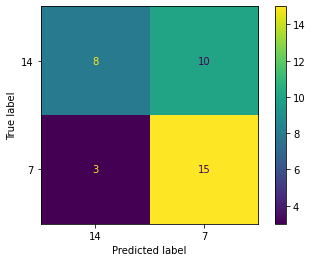

In [190]:
predY = model.predict(testX)
labels = [1,-1]
display_labels = [num1,num2]
cm = confusion_matrix(testY, predY, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
disp.plot()
plt.show()

In [211]:
classes = {j:[] for j in range(15)}

for j in range(len(y)): # takes data assigns it into a dictionary
    classes[int(y[j])].append(X[j].reshape(605,700))
#classes = {j:np.stack(classes[j]) for j in range(15)} # stack everything to be one numpy array
classes = {j:np.stack(classes[j]) for j in [0,5,7,8,13,14]}
#for j in range(15):
for j in [0,5,7,8,13,14]:
    print('Shape of data with label', j, ':', classes[j].shape)

Shape of data with label 0 : (39, 605, 700)
Shape of data with label 5 : (23, 605, 700)
Shape of data with label 7 : (67, 605, 700)
Shape of data with label 8 : (23, 605, 700)
Shape of data with label 13 : (61, 605, 700)
Shape of data with label 14 : (100, 605, 700)


In [226]:
def output_data6(num1, num2, dims, method='kmeans', size=22, split=0.7):
    # gathers training and testing data for num1 & num2 type data
    trainSize = int(size * split)
    testSize = size - trainSize
    x_train = np.concatenate([classes[num1][:trainSize].reshape(trainSize,605*700),
                            classes[num2][:trainSize].reshape(trainSize,605*700)])
    x_train = reduce_dim(x_train, dims, method)
    y_train = np.concatenate([np.ones(trainSize), -1*np.ones(trainSize)]).reshape(2*trainSize,)
    x_test = np.concatenate([classes[num1][trainSize:size].reshape(testSize,605*700),
                            classes[num2][trainSize:size].reshape(testSize,605*700)])
    x_test = reduce_dim(x_test, dims, method)
    max_val = np.max(x_train)
    y_test = np.concatenate([np.ones(testSize), -1*np.ones(testSize)]).reshape(2*testSize,)
    return x_train/max_val, y_train, x_test/max_val, y_test

In [236]:
def output_all_data6(dims, method='kmeans', size=22, split=0.7):
    # gathers training and testing data for num1 & num2 type data
    trainSize = int(size * split)
    testSize = size - trainSize
    x_train = np.zeros((6*trainSize,605*700))
    ii=0
    for i in [0,5,7,8,13,14]:
        i_classes = classes[i][:trainSize].reshape(trainSize,605*700)
        x_train[trainSize*ii:trainSize*(ii+1)] = i_classes
        ii = ii+1
    x_train = reduce_dim(x_train, dims, method)
    y_train = np.concatenate([np.full(trainSize,0), np.full(trainSize,1),
              np.full(trainSize,2),np.full(trainSize,3),np.full(trainSize,4),
              np.full(trainSize,5)]).reshape(6*trainSize,)
    x_test = np.zeros((6*testSize,605*700))
    ii=0
    for i in [0,5,7,8,13,14]:
        i_classes = classes[i][trainSize:size].reshape(testSize,605*700)
        x_test[testSize*ii:testSize*(ii+1)] = i_classes
        ii = ii+1
    x_test = reduce_dim(x_test, dims, method)
    max_val = np.max(x_train)
    y_test = np.concatenate([np.full(testSize,0), np.full(testSize,1),
              np.full(testSize,2),np.full(testSize,3),np.full(testSize,4),
              np.full(testSize,5)]).reshape(6*testSize,)
    return x_train/max_val, y_train, x_test/max_val, y_test

In [241]:
class1=14
class2=7
dims = 6
trainX, trainY, testX, testY = output_all_data6(dims)
model = KNNclassifier(trainX, trainY, n_neighbors)
accu = getAccuracy(testX, testY, model)
accu_vals.append(accu)
print(accu)

0.23809523809523808


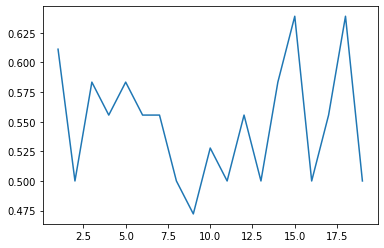

In [191]:
class1 = 14
class2 = 7
dim_vals = np.arange(1,20,1)
accu_vals = []
for i in dim_vals:
    dims = i
    trainX, trainY, testX, testY = output_data(class1,class2,dims)
    model = KNNclassifier(trainX, trainY, n_neighbors)
    accu = getAccuracy(testX, testY, model)
    accu_vals.append(accu)
plt.plot(dim_vals, accu_vals)

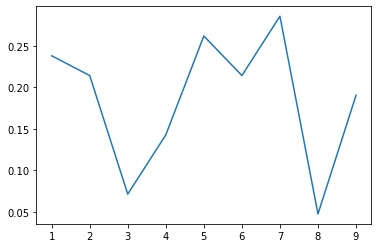

In [242]:
dim_vals = np.arange(1,10,1)
accu_vals = []
for i in dim_vals:
    dims = i
    trainX, trainY, testX, testY = output_all_data6(dims)
    model = KNNclassifier(trainX, trainY, n_neighbors)
    accu = getAccuracy(testX, testY, model)
    accu_vals.append(accu)
plt.plot(dim_vals, accu_vals)

In [244]:
n_neighbors = 5
dims = 6
trainX, trainY, testX, testY = output_all_data6(dims, method='none')
model = KNNclassifier(trainX, trainY, n_neighbors)
accu = getAccuracy(testX, testY, model)
print(accu)

0.16666666666666666


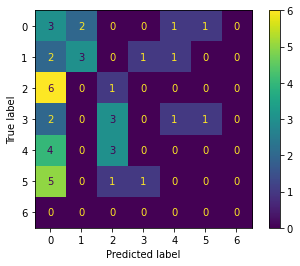

In [246]:
predY = model.predict(testX)
labels = np.arange(0,7,1)
cm = confusion_matrix(testY, predY, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.show()

## PCA for Retinal Scans

In [8]:
classes = {j:[] for j in range(15)}

for j in range(len(y)): # takes data assigns it into a dictionary
    classes[int(y[j])].append(X[j].reshape(605,700))
classes = {j:np.stack(classes[j]) for j in range(15)} # stack everything to be one numpy array
#classes = {j:np.stack(classes[j]) for j in [0,5,7,8,13,14]}
for j in range(15):
#for j in [0,5,7,8,13,14]:
    print('Shape of data with label', j, ':', classes[j].shape)

Shape of data with label 0 : (39, 605, 700)
Shape of data with label 1 : (5, 605, 700)
Shape of data with label 2 : (7, 605, 700)
Shape of data with label 3 : (6, 605, 700)
Shape of data with label 4 : (11, 605, 700)
Shape of data with label 5 : (23, 605, 700)
Shape of data with label 6 : (12, 605, 700)
Shape of data with label 7 : (67, 605, 700)
Shape of data with label 8 : (23, 605, 700)
Shape of data with label 9 : (5, 605, 700)
Shape of data with label 10 : (16, 605, 700)
Shape of data with label 11 : (14, 605, 700)
Shape of data with label 12 : (8, 605, 700)
Shape of data with label 13 : (61, 605, 700)
Shape of data with label 14 : (100, 605, 700)


In [14]:
# add size parameter?
def output_pca_data(num1, num2, num_components, size=50, split=0.7, method='pca', kernel='linear'):
    # gathers training and testing data for num1 & num2 type data
    trainSize = int(size * split)
    testSize = size - trainSize
    x_train = np.concatenate([classes[num1][:trainSize].reshape(trainSize,605*700),
                            classes[num2][:trainSize].reshape(trainSize,605*700)])
    evr = 0
    if method=='pca':
        pca = PCA(num_components).fit(x_train)
        evr = np.sum(pca.explained_variance_ratio_)
    elif method=='kernelpca':
        pca = KernelPCA(num_components, kernel=kernel).fit(x_train)
    x_train = pca.transform(x_train)
    y_train = np.concatenate([np.ones(trainSize), -1*np.ones(trainSize)]).reshape(2*trainSize,)
    x_test = np.concatenate([classes[num1][trainSize:size].reshape(testSize,605*700),
                            classes[num2][trainSize:size].reshape(testSize,605*700)])
    x_test = pca.transform(x_test)
    max_val = np.max(x_train)
    y_test = np.concatenate([np.ones(testSize), -1*np.ones(testSize)]).reshape(2*testSize,)
    return x_train/max_val, evr, y_train, x_test/max_val, y_test

In [39]:
def output_all_data_pca(num_components, method='pca', kernel='linear', size=50, split=0.7):
    pca1evr = False
    trainSize = int(size * split)
    testSize = size - trainSize
    x_train = np.zeros((15*trainSize,605*700))
    for i in range(15):
        i_classes = classes[i][:trainSize].reshape(trainSize,605*700)
        x_train[trainSize*i:trainSize*(i+1)] = i_classes
    evr = 0
    if method=='pca':
        pca = PCA(num_components).fit(x_train)
        evr = np.sum(pca.explained_variance_ratio_)
    elif method=='kernelpca':
        pca = KernelPCA(num_components, kernel=kernel).fit(x_train)
    x_train = pca.transform(x_train)
    y_train = np.concatenate([np.full(trainSize,0), np.full(trainSize,1),
              np.full(trainSize,2),np.full(trainSize,3),np.full(trainSize,4),
              np.full(trainSize,5),np.full(trainSize,6),np.full(trainSize,7),
              np.full(trainSize,8),np.full(trainSize,9),np.full(trainSize,10),np.full(trainSize,11),np.full(trainSize,12),np.full(trainSize,13),np.full(trainSize,14)]).reshape(15*trainSize,)
    x_test = np.zeros((15*testSize,605*700))
    for i in range(15):
        i_classes = classes[i][trainSize:size].reshape(testSize,605*700)
        x_test[testSize*i:testSize*(i+1)] = i_classes
    x_test = pca.transform(x_test)
    max_val = np.max(x_train)
    y_test = np.concatenate([np.full(testSize,0), np.full(testSize,1),
              np.full(testSize,2),np.full(testSize,3),np.full(testSize,4),
              np.full(testSize,5),np.full(testSize,6),np.full(testSize,7),
              np.full(testSize,8),np.full(testSize,9),np.full(testSize,10),np.full(testSize,11),np.full(testSize,12),np.full(testSize,13),np.full(testSize,14)]).reshape(15*testSize,)
    return x_train/max_val, evr, y_train, x_test/max_val, y_test

In [35]:
num1 = 14
num2 = 7
n_neighbors = 5
num_components = 4

In [36]:
trainX, evr1, trainY, testX, testY = output_pca_data(num1,num2,num_components,method='pca',size=60,split=0.7)
model = KNNclassifier(trainX, trainY, n_neighbors)
accu = getAccuracy(testX, testY, model)
print("Accuracy: ")
print(accu)

Accuracy: 
0.6666666666666666


In [38]:
classes = {j:[] for j in range(15)}

for j in range(len(y)): # takes data assigns it into a dictionary
    classes[int(y[j])].append(X[j].reshape(605,700))
#classes = {j:np.stack(classes[j]) for j in range(15)} # stack everything to be one numpy array
classes = {j:np.stack(classes[j]) for j in [0,5,7,8,13,14]}
#for j in range(15):
for j in [0,5,7,8,13,14]:
    print('Shape of data with label', j, ':', classes[j].shape)

Shape of data with label 0 : (39, 605, 700)
Shape of data with label 5 : (23, 605, 700)
Shape of data with label 7 : (67, 605, 700)
Shape of data with label 8 : (23, 605, 700)
Shape of data with label 13 : (61, 605, 700)
Shape of data with label 14 : (100, 605, 700)


In [40]:
def output_all_data_pca_6(num_components, method='pca', kernel='linear', size=22, split=0.7):
    pca1evr = False
    trainSize = int(size * split)
    testSize = size - trainSize
    x_train = np.zeros((6*trainSize,605*700))
    ii = 0
    for i in [0,5,7,8,13,14]:
        i_classes = classes[i][:trainSize].reshape(trainSize,605*700)
        x_train[trainSize*ii:trainSize*(ii+1)] = i_classes
        ii = ii +1
    evr = 0
    if method=='pca':
        pca = PCA(num_components).fit(x_train)
        evr = np.sum(pca.explained_variance_ratio_)
    elif method=='kernelpca':
        pca = KernelPCA(num_components, kernel=kernel).fit(x_train)
    x_train = pca.transform(x_train)
    y_train = np.concatenate([np.full(trainSize,0), np.full(trainSize,1),
              np.full(trainSize,2),np.full(trainSize,3),np.full(trainSize,4),
              np.full(trainSize,5)]).reshape(6*trainSize,)
    x_test = np.zeros((6*testSize,605*700))
    ii=0
    for i in [0,5,7,8,13,14]:
        i_classes = classes[i][trainSize:size].reshape(testSize,605*700)
        x_test[testSize*ii:testSize*(ii+1)] = i_classes
        ii = ii+1
    x_test = pca.transform(x_test)
    max_val = np.max(x_train)
    y_test = np.concatenate([np.full(testSize,0), np.full(testSize,1),
              np.full(testSize,2),np.full(testSize,3),np.full(testSize,4),
              np.full(testSize,5)]).reshape(6*testSize,)
    return x_train/max_val, evr, y_train, x_test/max_val, y_test

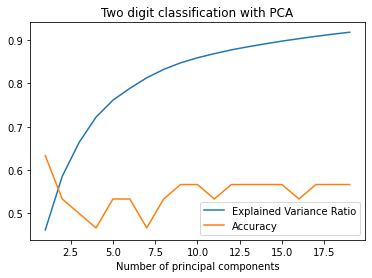

In [41]:
n_neighbors = 5
comps = np.arange(1,20,1)
evr_vals = []
accu_vals = []
for i in comps:
    num_components = i
    trainX, evr1, trainY, testX, testY = output_pca_data(num1,num2,num_components)
    model = KNNclassifier(trainX, trainY, n_neighbors)
    accu = getAccuracy(testX, testY, model)
    evr_vals.append(evr1)
    accu_vals.append(accu)
plt.plot(comps, evr_vals, comps, accu_vals)
plt.title("Two digit classification with PCA")
plt.legend(["Explained Variance Ratio", "Accuracy"])
plt.xlabel('Number of principal components')
plt.show()

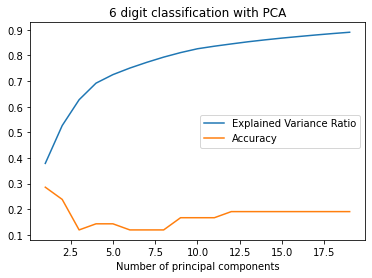

In [44]:
n_neighbors = 5
comps = np.arange(1,20,1)
evr_vals = []
accu_vals = []
for i in comps:
    num_components = i
    trainX, evr1, trainY, testX, testY = output_all_data_pca_6(num_components)
    model = KNNclassifier(trainX, trainY, n_neighbors)
    accu = getAccuracy(testX, testY, model)
    evr_vals.append(evr1)
    accu_vals.append(accu)
plt.plot(comps, evr_vals, comps, accu_vals)
plt.title("6 digit classification with PCA")
plt.legend(["Explained Variance Ratio", "Accuracy"])
plt.xlabel('Number of principal components')
plt.show()

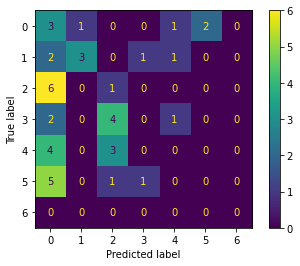

In [43]:
predY = model.predict(testX)
labels = np.arange(0,7,1)
cm = confusion_matrix(testY, predY, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.show()